# Things I had to do in the terminal before being able to use this notebook


## Use conda to build Python env with osmnx as main so that not upto date version in dependancies used but workable for osmnx

conda config --prepend channels conda-forge

conda create -n ox --strict-channel-priority osmnx

## go into env
conda activate ox

## install other libs that are needed for visulization
conda install matplotlib
conda install numpy
conda install -c anaconda ipykernel

## makes conda env into a kernel which then can be used by jupyter notebook
python -m ipykernel install --user --name=ox

## other Tool for queries to OpenStreetMap in testing phase
pip install OSMPythonTools


In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gd
%matplotlib inline

In [2]:
place_name = "Hessisch Lichtenau, Werra-Meißner-Kreis, Regierungsbezirk Kassel, Hessen, 37235, Germany"

In [3]:
# Specify the name that is used to seach for the data


# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)


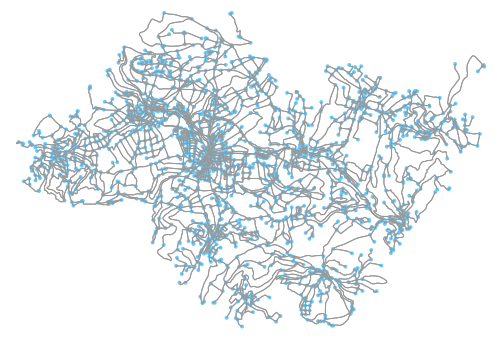

In [4]:
# Plot the streets
fig, ax = ox.plot_graph(graph)


Link for amenities:
https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare

In [5]:
#new query for all buildings in place of interest data similar but not identical...
buildings = ox.footprints_from_place(place_name)
#bos = buildings[buildings['amenity'].isin(buildings_of_interest)]
#separation to get all shops for nicer visualization
shop = buildings[buildings['shop'].notnull()]


In [6]:
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)

amenity = ['place_of_worship', 'community_centre', 'fast_food', 'townhall', 'bank', 'toilets', 'shelter', 'restaurant', 'pub', 'fire_station', 'fuel', 'police', 'car_wash']
shop = ['supermarket', 'car_repair', 'bakery', 'butcher', 'car', 'chemist', 'travel_agency', 'copyshop']
building = ['yes', 'industrial', 'church', 'hangar', 'office', 'garages', 'house', 'commercial', 'roof', 'shed', 'hut', 'garage', 'school', 'hospital', 'residential', 'barn', 'hotel', 'service', 'apartments', 'civic', 'retail', 'warehouse', 'detached', 'semidetached_house', 'kindergarten', 'transformer_tower', 'terrace']
leisure = ['dance']
office = ['forestry', 'government']
['amenity', 'shop', 'building', 'leisure', 'office']


In [7]:
#make geopandas of place of interest
#whole area
area = ox.gdf_from_place(place_name)
#basically all the ways one can move on !!BEWARE!! to my knowledge also not streets
nodes, edges = ox.graph_to_gdfs(graph)


In [8]:
#extra just for hospitals for nicer visulisation
healthcare = ['baby_hatch',
             'clinic',
             'dentist',
             'doctors',
             'hospital',
             'nursing_home',
             'pharmacy',
             'social_facility',
             'veterinary']
boish = ox.pois_from_place(place_name, amenities=healthcare)
#boisr = ox.pois_from_place(place_name, shop=)

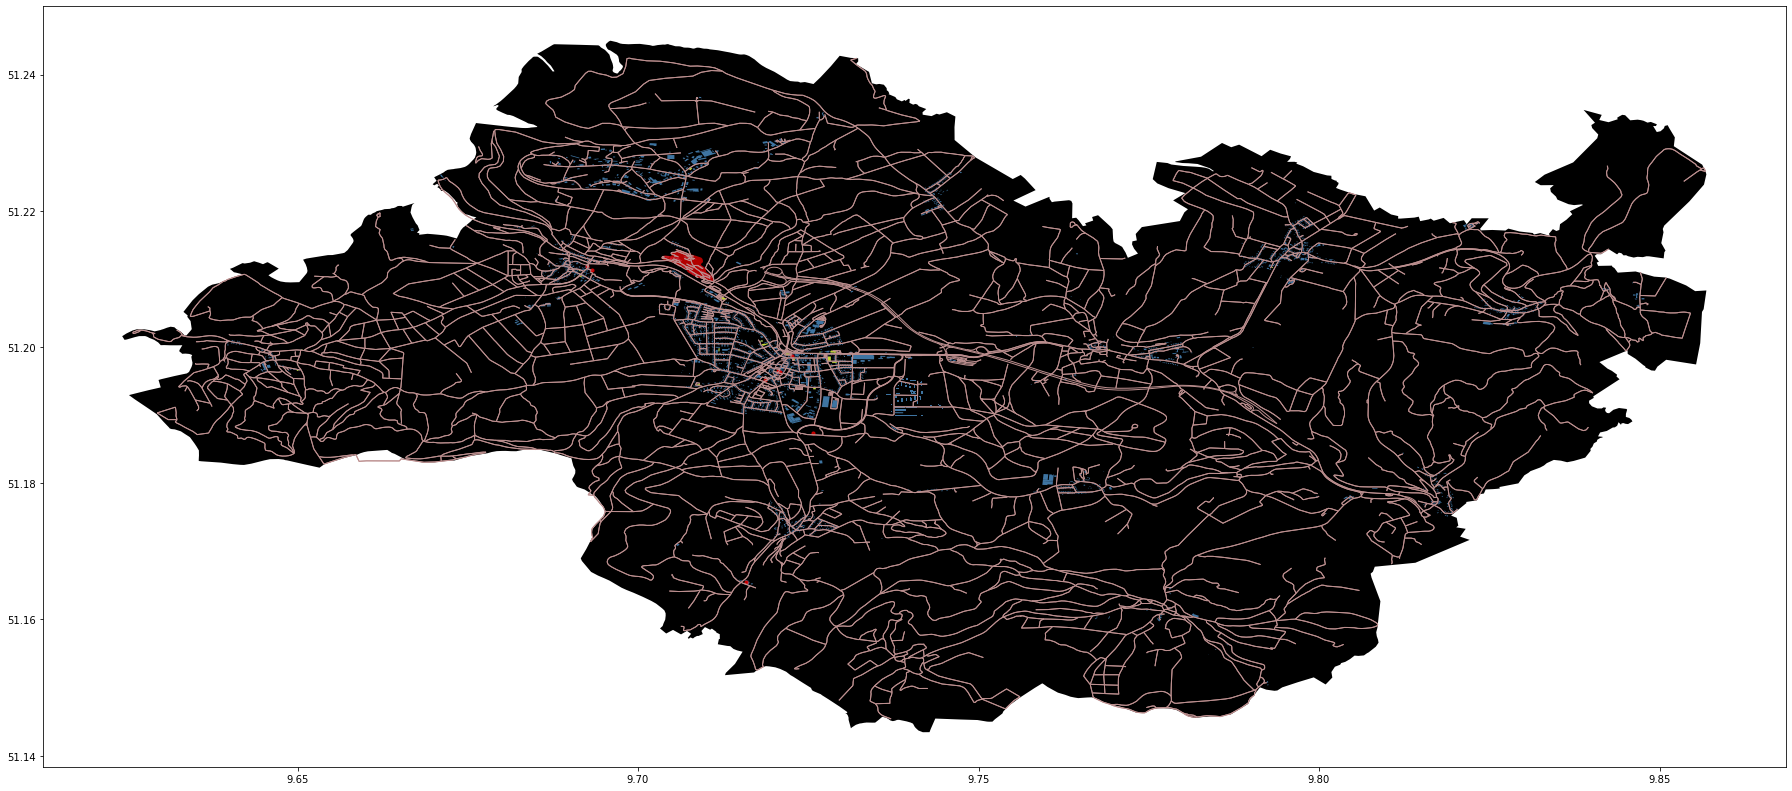

In [9]:
fig, ax = plt.subplots(figsize=(25,16))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings of interest and shops
buildings.plot(ax=ax, facecolor='steelblue', alpha=0.9)
shop.plot(ax=ax, facecolor='yellow', alpha=0.7)

# Plot healthcare
boish.plot(ax=ax, color='red', alpha=0.7, markersize=10)

plt.tight_layout()


In [10]:
boish

osmid                                           geometry  \
2077989911  2077989911                           POINT (9.71579 51.16551)   
2077995081  2077995081                           POINT (9.72566 51.18731)   
2109192856  2109192856                           POINT (9.72262 51.19872)   
2109662336  2109662336                           POINT (9.72061 51.19647)   
2109662342  2109662342                           POINT (9.72079 51.19638)   
2109761485  2109761485                           POINT (9.71870 51.19517)   
3647848086  3647848086                           POINT (9.69245 51.21190)   
3707494740  3707494740                           POINT (9.69322 51.21128)   
414752958    414752958  POLYGON ((9.71028 51.20976, 9.70977 51.20989, ...   

           addr:housenumber addr:postcode       addr:street     amenity  \
2077989911              NaN           NaN               NaN  veterinary   
2077995081              NaN           NaN               NaN  veterinary   
2109192856                3         37235  Landgrafenstraße    pharmacy   
2109662336              NaN           NaN               NaN    pharmacy   
2109662342              NaN         37235  Landgrafenstraße    pharmacy   
2109761485              NaN           NaN               NaN     doctors   
3647848086              NaN           NaN               NaN    pharmacy   
3707494740              NaN           NaN               NaN     dentist   
414752958               NaN         37235     Am Mühlenberg    hospital   

           emergency                           name toilets:wheelchair  \
2077989911       NaN  Kleintierpraxis Walbachsmühle                NaN   
2077995081       NaN                            NaN                NaN   
2109192856       NaN              Meissner-Apotheke                NaN   
2109662336       NaN             Landgrafenapotheke                NaN   
2109662342       NaN                  Stadtapotheke                NaN   
2109761485       NaN           Dr. Rüdiger Froelich                NaN   
3647848086       NaN          Apotheke Fürstenhagen                NaN   
3707494740       NaN       Drs. Beutler & Schneider                NaN   
414752958        NaN           Orthopädische Klinik                yes   

           wheelchair  ... dispensing healthcare         operator  \
2077989911        NaN  ...        NaN        NaN              NaN   
2077995081        NaN  ...        NaN        NaN              NaN   
2109192856        yes  ...        yes   pharmacy  Herbert Volkmar   
2109662336    limited  ...        yes   pharmacy              NaN   
2109662342         no  ...        yes   pharmacy              NaN   
2109761485    limited  ...        NaN     doctor              NaN   
3647848086        NaN  ...        yes        NaN    Gerhard Peter   
3707494740        NaN  ...        NaN        NaN              NaN   
414752958         yes  ...        NaN        NaN              NaN   

                     phone                             website  \
2077989911             NaN                                 NaN   
2077995081             NaN                                 NaN   
2109192856  +49 5602 93830    https://www.meissner-apotheke.de   
2109662336             NaN                                 NaN   
2109662342             NaN  http://www.priv-stadt-apotheke.de/   
2109761485             NaN                                 NaN   
3647848086   +49 5602 2427                                 NaN   
3707494740             NaN     http://www.beutler-schneider.de   
414752958       +495602830      http://www.klinik-lichtenau.de   

           healthcare:speciality  \
2077989911                   NaN   
2077995081                   NaN   
2109192856                   NaN   
2109662336                   NaN   
2109662342                   NaN   
2109761485               general   
3647848086                   NaN   
3707494740                   NaN   
414752958                    NaN   

                                         

In [11]:
ox.pd.set_option('display.max_rows', None)

In [12]:
buildings

nodes  \
44029570   [559801840, 559801909, 559801844, 3433469254, ...   
44045779   [559951576, 559951577, 3676570290, 3676570287,...   
44045780   [559951579, 559951580, 559951545, 559951546, 5...   
44045781   [559951565, 559951560, 559951561, 559951563, 5...   
44045782   [559951567, 559951564, 559951566, 559951568, 5...   
44045783   [559951556, 559951549, 559951558, 559951559, 5...   
44045784   [559951550, 559951552, 559951553, 559951554, 5...   
61963952   [772479918, 772479919, 772479920, 772479921, 7...   
61963967   [772479974, 772479975, 772479976, 772479977, 7...   
61964097   [772480906, 772480907, 772480908, 772480910, 7...   
61964126   [772481219, 772481217, 772481230, 772481231, 7...   
108414328  [5885132850, 5885132849, 5885132847, 588513284...   
108447530  [1244326046, 1244326039, 1244326036, 124432604...   
112893182  [1282084447, 1282084397, 1282084415, 128208447...   
112897038  [1282123634, 1282123572, 1282123580, 128212360...   
114397517  [1296047202, 1296047270, 1296047255, 129604721...   
114425738  [1296206930, 1296206948, 1296206933, 129620689...   
115342840  [1303581278, 1303581657, 1303581055, 130358188...   
115342850  [1303580680, 1303581223, 1303581007, 130358063...   
115342869  [1303581342, 1303581404, 1303581196, 130358070...   
115342879  [1303580900, 1303581496, 1303580696, 130358103...   
115342894  [1303580793, 1303581457, 1303581482, 130358069...   
115342930  [1303581852, 1303581573, 1303580774, 130358137...   
120494710  [1351018730, 1351018729, 1351018739, 135101874...   
120494711  [1351018738, 1351018727, 1351018742, 135101873...   
120494712  [1351018744, 1351018728, 1351018750, 135101873...   
120494713  [1351018733, 1351018746, 1351018743, 135101873...   
120494714  [1351018734, 1351018736, 1351018731, 135101873...   
120494715  [1351018732, 1351018741, 1351018726, 135101874...   
120494729  [1351018850, 1351018848, 1351018847, 135102039...   
120494927  [1351020380, 1351020383, 1351020374, 135102037...   
120494928  [1351020391, 1351020392, 1351020385, 135102039...   
120494929  [1351020381, 1351020389, 1351020377, 135102038...   
146943588  [1601525818, 1601525844, 1601525834, 160152583...   
157580875  [1698178244, 1698178242, 1698178237, 169817824...   
157706234  [1699611087, 1699611093, 1699611090, 169961108...   
158095905  [1703561121, 1703561123, 1703561120, 170356112...   
158096420  [1703562731, 1703562726, 1703562757, 170356273...   
158096421  [1703562732, 1703562730, 1703562740, 170356276...   
158096422  [1703562755, 1703562735, 1703562737, 170356275...   
158096425  [1703562729, 5250868674, 1703562758, 170356273...   
158096480  [1703563289, 1703563291, 1703563290, 170356327...   
158096738  [1703565386, 1703565372, 1703565370, 170356537...   
158188799  [1704183276, 1704183263, 1704183269, 170418325...   
158188800  [1704183272, 1704183261, 1704183266, 170418323...   
158188801  [1704183228, 1704183220, 1704183224, 170418324...   
158188802  [1704183256, 1704183232, 1704183241, 170418324...   
158656394  [1708122281, 1708122277, 1708122279, 170812230...   
158656580  [1708125848, 1708125832, 1708125847, 170812585...   
158656581  [1708125854, 1708125842, 1708125837, 170812582...   
158656762  [1708132873, 1708132877, 3503253512, 350325351...   
158656764  [1708132921, 1708132924, 1708132861, 213977795...   
158656767  [1708132956, 1708132857, 1708132846, 170813285...   
158656768  [1708132850, 1708132896, 1708132903, 170813294...   
158656770  [1708132918, 1708132953, 1708132927, 170813290...   
158656949  [1708133806, 1708133812, 1708133809, 170813380...   
158688248  [1708440698, 1708440697, 1708440696, 170844069...   
158694829  [1708494086, 4867858472, 1708494087, 170849408...   
163584428  [1752510686, 1752510688, 1752510690, 175251070...   
163584429  [1752510721, 1752510767, 1752510765, 175251071...   
163584430  [1752510607, 1752510625, 1752510628, 175251061...   
163584431  [1752510639, 1752510643, 1752510648, 175251064...   
163584432  [1752510710,

In [13]:
#buildings.loc[buildings['building']=='detached']

In [14]:
#bois2 = buildings.loc[:, ['amenity','shop','geometry','nodes']]


In [15]:
#for x in bois2.index:
#    bois2.loc[x]

In [16]:
#buildings = ox.footprints_from_place(place_name)
#shop = buildings[buildings['shop'].notnull()]

In [17]:
#idea check to see if ox.pois_from_place(place_name, amenities=buildings_of_interest) and ox.footprints_from_place(place_name) 
#do the same not finished but they are not, for Wedding!
bos = buildings[buildings['building'].isin(['construction'])]
bos

Empty GeoDataFrame
Columns: [nodes, building, building:part, name, geometry, addr:housenumber, addr:postcode, addr:street, opening_hours, shop, wheelchair, operator, website, addr:city, addr:country, building:type, building:use, building:roof:shape, amenity, denomination, religion, wikidata, brand, brand:wikidata, brand:wikipedia, phone, addr:housename, cuisine, internet_access, outdoor_seating, takeaway, fax, email, office, historic, atm, man_made, addr:suburb, ruins, layer, delivery, drive_through, tourism, shelter_type, addr:hamlet, toilets:wheelchair, name:de, ele, description, historic:civilization, building:levels, roof:levels, contact:phone, contact:website, ref:shop:num, ref:vatin, image, tomb, wikimedia_commons, alt_name, level, rooms, emergency, roof:shape, note, old_name, power, dance:teaching, leisure, craft, asb, note:de, onkz, source, telecom, capacity, fixme, ref, height, object:postcode, object:street, object:village, old_operator, owner, start_date, year_of_construction, members, type]
Index: []

[0 rows x 88 columns]

In [18]:
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)

amenity = ['place_of_worship', 'community_centre', 'fast_food', 'townhall', 'bank', 'toilets', 'shelter', 'restaurant', 'pub', 'fire_station', 'fuel', 'police', 'car_wash']
shop = ['supermarket', 'car_repair', 'bakery', 'butcher', 'car', 'chemist', 'travel_agency', 'copyshop']
building = ['yes', 'industrial', 'church', 'hangar', 'office', 'garages', 'house', 'commercial', 'roof', 'shed', 'hut', 'garage', 'school', 'hospital', 'residential', 'barn', 'hotel', 'service', 'apartments', 'civic', 'retail', 'warehouse', 'detached', 'semidetached_house', 'kindergarten', 'transformer_tower', 'terrace']
leisure = ['dance']
office = ['forestry', 'government']
['amenity', 'shop', 'building', 'leisure', 'office']


In [19]:
def assign_location_classifier(df_buildings):
        '''Build reference lists for assign_building_type() from given dataframe.
        Should be produced by read_geodata.py.
        Possible classes and therefore dictionary keys are:
        'excluded_buildings' = buildings not included because they do not fit any class
        'hospital' = hospitals
        'work' = anything a person can work at
        'public' = right now religous and sport buildings #FIXME-Discussion: restaurantes, bars, cafe?
        'school' = places with a lot of young people
        Sorting idea as of right now everything is work place if not in any other list
        : return: location class dictionary loc_class_dic['school'] = ['school','university','kindergarten']

        '''
        loc_class_dic = {}

        loc_class_dic['excluded_buildings'] = ['garage','garages', 'roof', 'shed', 'bungalow', 'barn', 'silo']
        loc_class_dic['hospital'] = ['hospital']
        loc_class_dic['morgue'] = ['morgue']
        loc_class_dic['mixing_loc'] = ['mixing_loc']
        
        
        cols = ['amenity', 'shop', 'leisure', 'sport','building']
        for col in cols:
            try:
                list(df_buildings[col].unique())
            except:
                buildings[col] = [np.nan]*len(buildings)
       
    
        loc_class_dic['work'] = ['commercial','civic', 'transformer_tower', 'warehouse','hangar',' industrial', 'office', 'car_repair']\
            + list(df_buildings['amenity'].unique())\
            + list(df_buildings['shop'].unique())

        # What is a public place or just work place e.g. restaurante, cafe...

        loc_class_dic['public'] = ['bakery', 'service','butcher', 'car', 'chemist', 'travel_agency', 'copyshop','public','supermarket', 'chapel','hotel', 'pub','church','watermill', 'parish_hall', 'townhall', 'restaurant', 'grocery_store', 'cafe',\
                                   'sports_centre', 'community_centre','fast_food','townhall', 'bank', 'toilets','place_of_worship','church']\
            + list(df_buildings['leisure'].unique())\
            + list(df_buildings['sport'].unique())

        loc_class_dic['school'] = ['school', 'university', 'kindergarten']
        # Cleaning the list public place of nan
        loc_class_dic['public'] = [x for x in loc_class_dic['public'] if ~pd.isnull(x)]
        # Removing values from workplace_list that are in work place and in another list
        for x in loc_class_dic['hospital'] + [np.nan] + loc_class_dic['public'] + loc_class_dic['school']:
            while x in loc_class_dic['work']:
                loc_class_dic['work'].remove(x)

        return loc_class_dic

def assign_building_type(building_lst: list, loc_class_dic: dict):
    '''set building type according to value in building_lst and where it matches with reference lists

        : return: string with building type
    '''
    # auto assign is home
    building_type = 'home'
    # if any entry of building_lst matches any location class entry: it is assigned to that class
    for key in loc_class_dic:
        if any(elem in loc_class_dic[key] for elem in building_lst):
            building_type = key

    return building_type

In [20]:
loc_class_dic = assign_location_classifier(buildings)
buildings['building_type']= buildings.apply(lambda row: assign_building_type(row[col_names].dropna().unique(), loc_class_dic), axis = 1)
buildings['building_type'].value_counts()

home                  3633
excluded_buildings     127
public                  41
work                    26
school                  10
hospital                 6
Name: building_type, dtype: int64

In [21]:
import matplotlib.cm as cm 

/home/maxim/anaconda3/envs/ox/lib/python3.8/site-packages/geopandas/plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


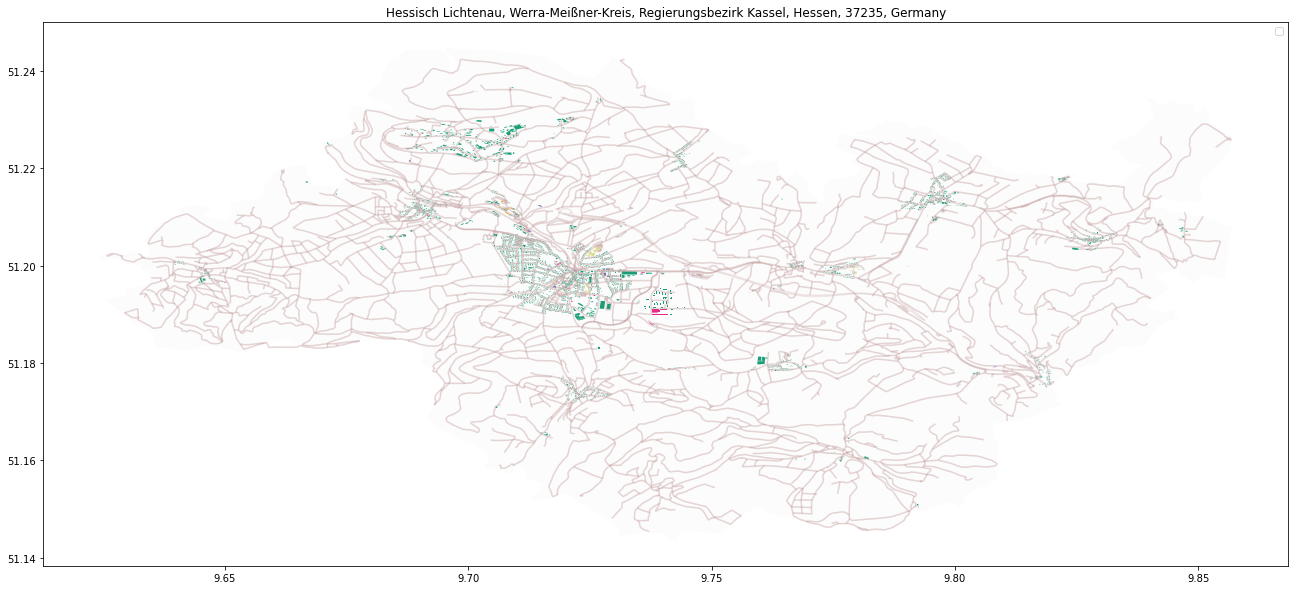

In [22]:
locationsCmap1 = cm.get_cmap('Dark2')  # for our locations
locationsCmap2 = cm.get_cmap('tab20')
locationTypeColors = {
    'home': locationsCmap1(0),  # aquamarine
    'public': locationsCmap1(2),  # purple-blue
    'work': locationsCmap1(3),  # deep pink
    'hospital': locationsCmap1(5),  # mustard yellow
    'school': locationsCmap2(17),  # olive green - khaki
    'morgue': locationsCmap1(7)  # gray
}
plotrange=0.02
neighbourhood = 3
print()


fig, ax = plt.subplots(figsize=(25,10))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='black' ,alpha=0.01)
edges.plot(ax=ax, color='#BC8F8F', alpha=0.2)

for building_type in locationTypeColors:
    buildings[buildings['building_type']==building_type].plot(ax=ax, color=locationTypeColors[building_type], label=building_type, legend=False,legend_kwds={'frameon':False, 'loc':'lower right'})
    #ax.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H', c=locationsCmap1(5))
    #ax.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M', c=locationsCmap1(7))
    #ax.set_label('s')
    #handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles=[building_type], loc='lower right')
plt.legend()
plt.title(place_name)
plt.savefig(place_name+'_location_type_map.png', dpi=600)
#plt.legend()    
#ax.set_xlim(list_of_neighbourhood_centers[neighbourhood].x-plotrange,list_of_neighbourhood_centers[neighbourhood].x+plotrange)
#ax.set_ylim(list_of_neighbourhood_centers[neighbourhood].y-plotrange,list_of_neighbourhood_centers[neighbourhood].y+plotrange)